<font face="gotham" color="purple"> **MACROECONOMÍA II \\
Tópico: Dinámica Macroeconómica**</font>

`Luis Chávez`

![texto del vínculo](https://fedor.iskh.me/assets/img/dag3logo.png)

# <font face="gotham" color="purple"> **1. Modelo dinámico básico**</font>

Sea:
$$C(t)=a+bY(t)$$
$$D(t)=C(t)+I+G$$
$$\Delta Y(t+1)=\lambda[D(t)-Y(t)], \ \lambda>0$$
$$\Delta Y(t+1)=0$$

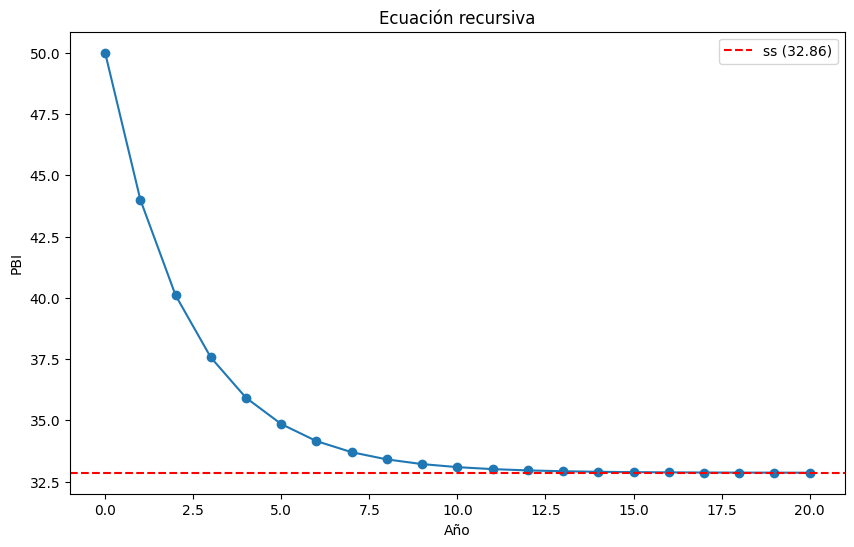

In [24]:
# Ecuación recursiva
# ==============================================================================
import matplotlib.pyplot as plt

# Parámetros
lambd = 0.5
a = 10
I = 5
G = 8
b = 0.3

# Ecuación recursiva
def y_recursive(Y_t, lambd, a, I, G, b):
  """Calculates Y(t+1) based on the recursive equation."""
  return lambd * (a + I + G) + (1 - lambd * (1 - b)) * Y_t

# Condición inicial
Y_0 = 50

# Simular
num_steps = 20
Y_values = [Y_0]

for t in range(num_steps):
  Y_t1 = y_recursive(Y_values[-1], lambd, a, I, G, b)
  Y_values.append(Y_t1)

# Ploteo
plt.figure(figsize=(10, 6))
plt.plot(range(num_steps + 1), Y_values, marker='o', linestyle='-')
plt.axhline(y=Y_ss, color='r', linestyle='--', label=f'ss ({Y_ss:.2f})')
plt.xlabel('Año')
plt.ylabel('PBI')
plt.title('Ecuación recursiva')
plt.legend()
plt.show()

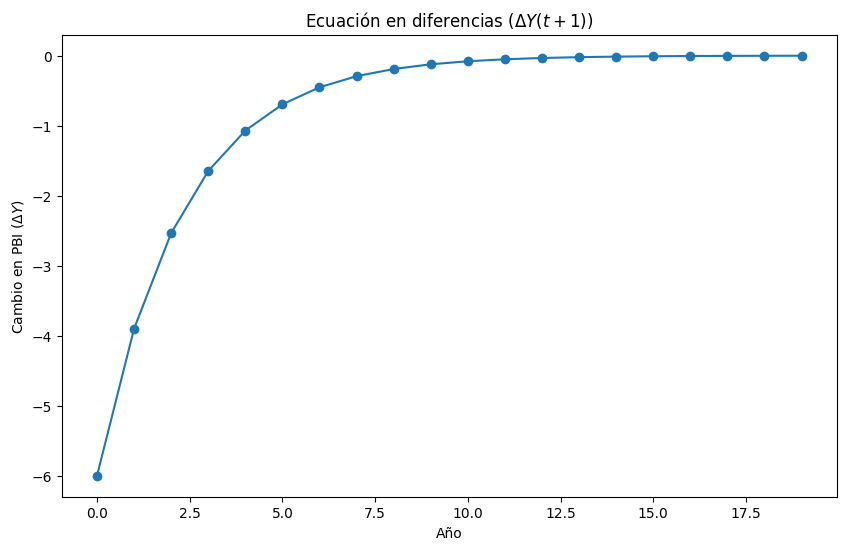

In [25]:
# Ecuación en diferencia
# ==============================================================================
import matplotlib.pyplot as plt
# Ecuación en diferencia
def delta_y(Y_t, lambd, a, I, G, b):
  """Calculates the change in Y (Delta Y)."""
  return lambd * (a + I + G) - lambd * (1 - b) * Y_t

# Valores de Delta Y
delta_Y_values = [delta_y(Y_values[t], lambd, a, I, G, b) for t in range(num_steps)]

# Ploteo
plt.figure(figsize=(10, 6))
plt.plot(range(num_steps), delta_Y_values, marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Cambio en PBI ($\Delta Y$)')
plt.title('Ecuación en diferencias ($\Delta Y(t+1)$)')
plt.show()

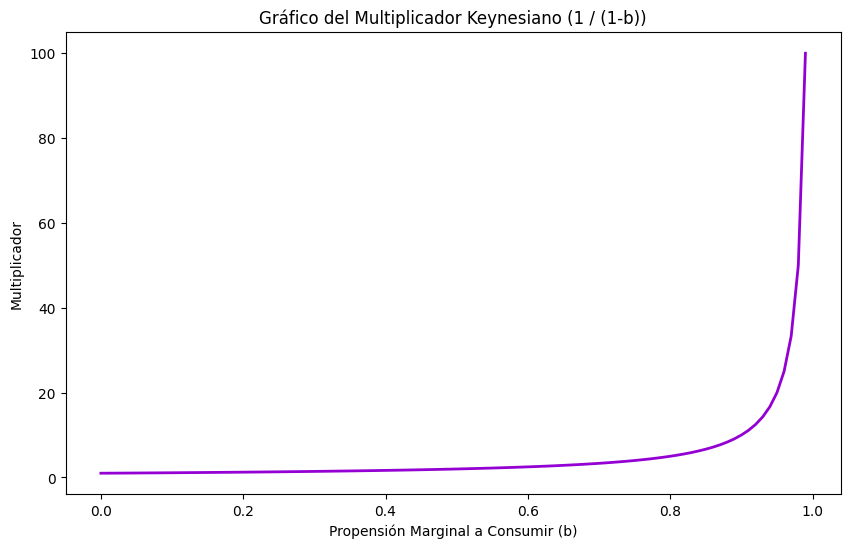

In [34]:
# Multiplicador
# ==============================================================================

import matplotlib.pyplot as plt
import numpy as np

# Valores de b
b_values = np.linspace(0, 0.99, 100)  # Avoid b=1

# Calcular el multiplicador
multiplier = 1 / (1 - b_values)

# Ploteo
plt.figure(figsize=(10, 6))
plt.plot(b_values, multiplier, color='darkviolet', linewidth=2)
plt.xlabel('Propensión Marginal a Consumir (b)')
plt.ylabel('Multiplicador')
plt.title('Gráfico del Multiplicador Keynesiano (1 / (1-b))')
plt.show()